In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd

In [2]:
#Import data
data = pd.read_csv("data/22Na_MCA_950V_220810.txt",dtype=np.float64)
mca_bins = data.iloc[:,0]
mca_cnts = data.iloc[:,1]
mca_bins = np.asarray(mca_bins,dtype=np.double)
mca_cnts = np.asarray(mca_cnts)

dataint = pd.read_csv("data/22Na_Integral_950V_220810.txt",dtype=np.float64)
int_bins = dataint.iloc[:,0]
int_cnts = dataint.iloc[:,1]
int_bins = np.asarray(int_bins,dtype=np.double)
int_cnts = np.asarray(int_cnts)


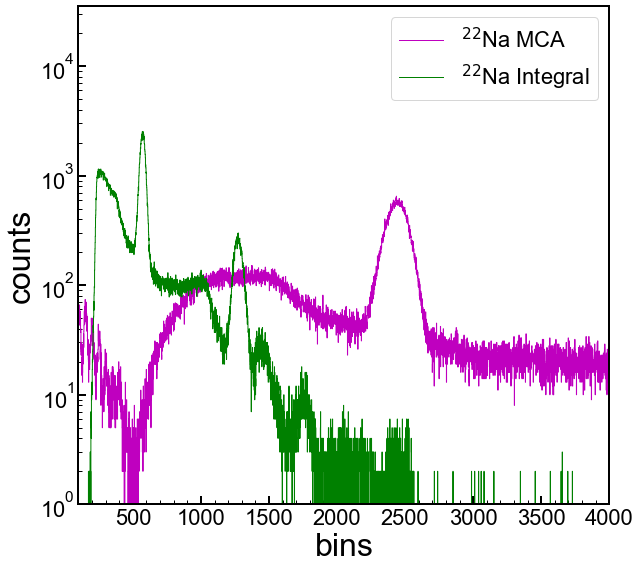

In [3]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=4000
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(mca_bins,mca_cnts,color='m',where='mid', linestyle='-',label='$^{22}$Na MCA', linewidth=1)
ax1.step(int_bins,int_cnts,color='g',where='mid', linestyle='-',label='$^{22}$Na Integral', linewidth=1)



ymin = 1.0
ymax = 35000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [4]:
import lmfit as lf
from scipy.interpolate import InterpolatedUnivariateSpline as interp

def gaussian(x,a,m,s):
    return a*np.exp(-(x-m)**2/(2*s**2))

gauss_mod = lf.Model(gaussian)
gauss_params = gauss_mod.make_params()
gauss_params.add('s',value=1,min=0)

fine = np.arange(min(mca_bins),max(mca_bins))

In [5]:

interpolated = interp(mca_bins,mca_cnts,k=5)
interpolatey = interpolated(fine)
#print(interpolatey[abs(fine - a) < 10])
#print(fine[abs(fine - a) < 10])

In [6]:
a=2440
arange=150
gauss_params.add('m',value=a,vary=True)
gauss_params.add('a',value=interpolatey[fine==a][0],vary=True)
fita_mca = gauss_mod.fit(interpolatey[abs(fine - a) < arange],gauss_params,x=fine[abs(fine - a) < arange])
print(fita_mca.best_values)

b=5900
brange=400
gauss_params.add('m',value=b,vary=True)
gauss_params.add('a',value=interpolatey[fine==b][0],vary=True)
fitb_mca = gauss_mod.fit(interpolatey[abs(fine - b) < brange],gauss_params,x=fine[abs(fine - b) < brange])
print(fitb_mca.best_values)

{'a': 572.6661571341845, 'm': 2441.824757294914, 's': 84.89943892445349}
{'a': 63.175681792156894, 'm': 5789.875834613403, 's': 147.07442487543395}


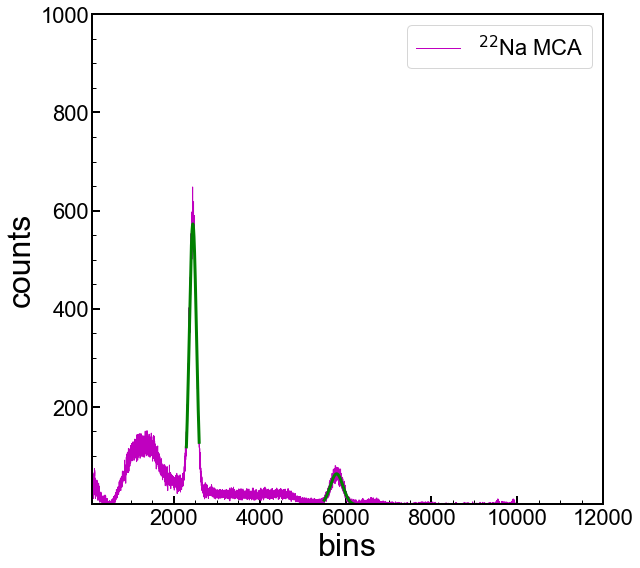

In [7]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=12000
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(mca_bins,mca_cnts,color='m',where='mid', linestyle='-',label='$^{22}$Na MCA', linewidth=1)
plt.plot(fine[abs(fine - a) < arange],fita_mca.best_fit,color='green',linewidth=3)
plt.plot(fine[abs(fine - b) < brange],fitb_mca.best_fit,color='green',linewidth=3)


ymin = 1.0
ymax = 1000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [8]:
interpolated = interp(int_bins,int_cnts,k=5)
interpolatey = interpolated(fine)

In [9]:
a=575
arange=40
gauss_params.add('m',value=a,vary=True)
gauss_params.add('a',value=interpolatey[fine==a][0],vary=True)
fita_int = gauss_mod.fit(interpolatey[abs(fine - a) < arange],gauss_params,x=fine[abs(fine - a) < arange])
print(fita_int.best_values)

b=1270
brange=50
gauss_params.add('m',value=b,vary=True)
gauss_params.add('a',value=interpolatey[fine==b][0],vary=True)
fitb_int = gauss_mod.fit(interpolatey[abs(fine - b) < brange],gauss_params,x=fine[abs(fine - b) < brange])
print(fitb_int.best_values)

{'a': 2435.1739281018727, 'm': 571.6677898786076, 's': 20.11071703643626}
{'a': 267.4392749216133, 'm': 1272.8881762086285, 's': 33.59500477002636}


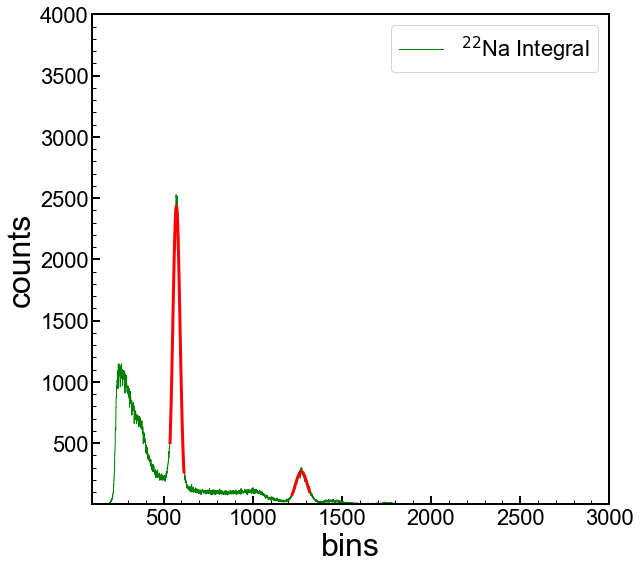

In [10]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

blue = '#118DFA'
xmin=100
xmax=3000
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
ax1.step(int_bins,int_cnts,color='g',where='mid', linestyle='-',label='$^{22}$Na Integral', linewidth=1)
plt.plot(fine[abs(fine - a) < arange],fita_int.best_fit,color='red',linewidth=3)
plt.plot(fine[abs(fine - b) < brange],fitb_int.best_fit,color='red',linewidth=3)


ymin = 1.0
ymax = 4000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'bins')
ax1.set_ylabel('counts')
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [11]:
#calibration annihl-0.501998 MeV; 22Na-1.2745 MeV
mmca = (1274.5-510.998)/(fitb_mca.best_values['m']-fita_mca.best_values['m'])
bmca = 510.998 - mmca*fita_mca.best_values['m'] 

mint = (1274.5-510.998)/(fitb_int.best_values['m']-fita_int.best_values['m'])
bint = 510.998 - mint*fita_int.best_values['m'] 


calmca = lambda b: mmca*b+bmca
calint = lambda b: mint*b+bint


print(fita_mca.best_values['m'])
print(mmca)
print(bmca)
print(calmca(mca_bins))
print(mca_bins)

2441.824757294914
0.22804371330305442
-45.84478488886185
[ -45.61674118  -45.38869746  -45.16065375 ... 3689.73928273 3689.96732644
 3690.19537016]
[1.0000e+00 2.0000e+00 3.0000e+00 ... 1.6381e+04 1.6382e+04 1.6383e+04]


$^{22}$Na MCA x 5.00


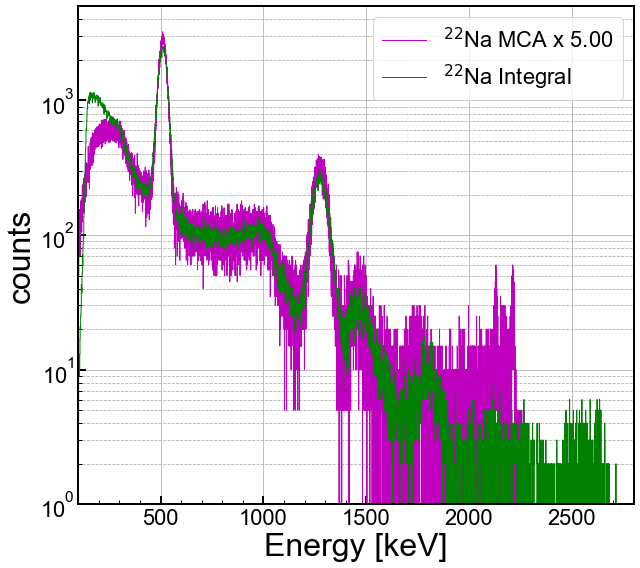

In [12]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

fac=(100/20.0);


blue = '#118DFA'
xmin=100
xmax=2800.0
stepsize=100
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#ax1.step(bknd_bins,bknd_cnts, where='mid',color='m', linestyle='-', \
#            label='background', linewidth=2)
labelstr='$^{{22}}$Na MCA x {0:2.2f}'.format(fac)
print(labelstr)
ax1.step(calmca(mca_bins),fac*mca_cnts,color='m',where='mid', linestyle='-',label=labelstr, linewidth=1)
ax1.step(calint(int_bins),int_cnts,color='g',where='mid', linestyle='-',label='$^{22}$Na Integral', linewidth=1)


ymin = 1.0
ymax = 5000.0


#ax1.fill_between(bknd_bins,np.zeros(np.shape(bknd_bins)),bknd_cnts,step='mid',facecolor='m',alpha=0.4, \
#                 label='')



#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Energy [keV]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()